# 문제 정의
* 플랫폼 별 광고비 지출에 다른 판매량 분석 및 예측

# 데이터 수집
* https://www.kaggle.com/datasets/ashydv/advertising-dataset


# 라이브러리 불러오기

In [43]:
# ------------------------
# scikit-learn 설치 및 버전 확인
# ------------------------
# pip install scikit-learn

import sklearn
sklearn.__version__

'1.6.1'

<Axes: >

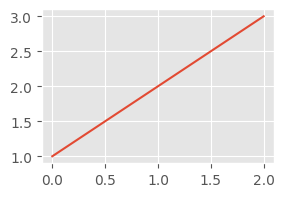

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')
pd.Series([1,2,3]).plot(figsize=(3,2))


# 데이터 불러오기

In [45]:
df = pd.read_csv('../data/advertising.csv')

df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


# 데이터 탐색
* 종속변수와 독립변수의 관계를 중심으로 탐색합니다.

## 매체별 광고비에 따른 판매량

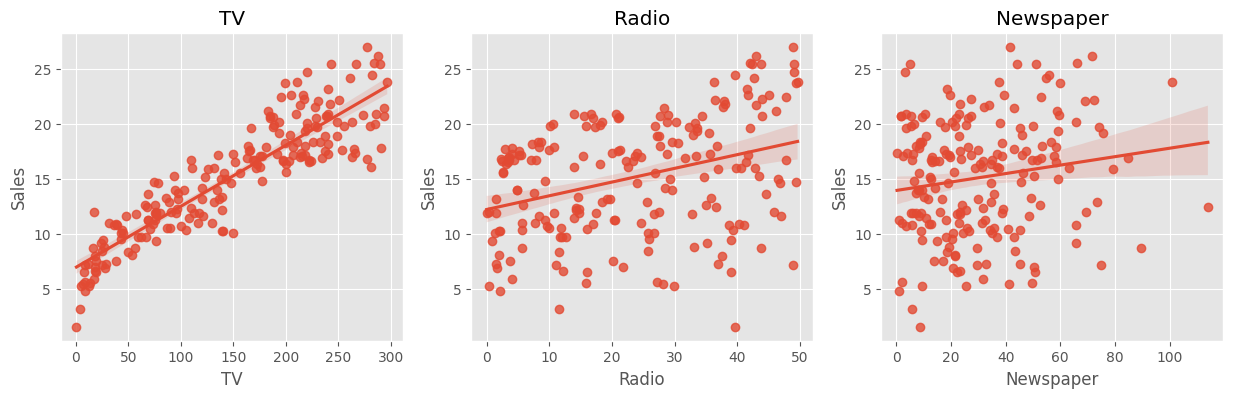

In [47]:
fig, ax = plt.subplots(1,3, figsize=(15,4))
for i, feature_name in enumerate(df.columns[:3]):
    sns.regplot(data=df, x=feature_name, y='Sales', ax=ax[i])
    ax[i].set_title(feature_name)

## 상관계수
* 종속변수와 독립변수 간 상관관계를 확인합니다.

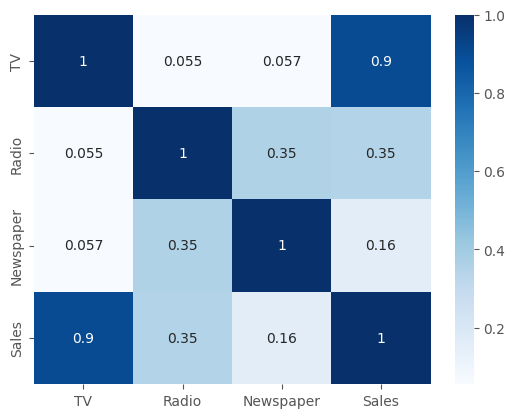

In [48]:
sns.heatmap(df.corr(), cmap='Blues', annot=True);

# 단순선형회귀
* TV광고량에 따른 판매량 예측

## 독립변수, 종속변수 선택
* 독립변수는 1개여도 2차원으로 다룹니다.

In [49]:
X = df[["TV"]]
y = df["Sales"]

## 훈련세트, 테스트세트 분할
* 모듈 : `model_selection`
* 함수 : `train_test_split`

In [61]:
# ------------------------------------------
# 훈련세트, 테스트세트 분할
# ------------------------------------------
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((150, 1), (50, 1), (150,), (50,))

In [28]:
train_test_split?

Signature:
train_test_split(
    *arrays,
    test_size=None,
    train_size=None,
    random_state=None,
    shuffle=True,
    stratify=None,
)
Docstring:
Split arrays or matrices into random train and test subsets.

Quick utility that wraps input validation,
``next(ShuffleSplit().split(X, y))``, and application to input data
into a single call for splitting (and optionally subsampling) data into a
one-liner.

Read more in the :ref:`User Guide <cross_validation>`.

Parameters
----------
*arrays : sequence of indexables with same length / shape[0]
    Allowed inputs are lists, numpy arrays, scipy-sparse
    matrices or pandas dataframes.

test_size : float or int, default=None
    If float, should be between 0.0 and 1.0 and represent the proportion
    of the dataset to include in the test split. If int, represents the
    absolute number of test samples. If None, the value is set to the
    complement of the train size. If ``train_size`` is also None, it will
    be set to 0.25.

trai

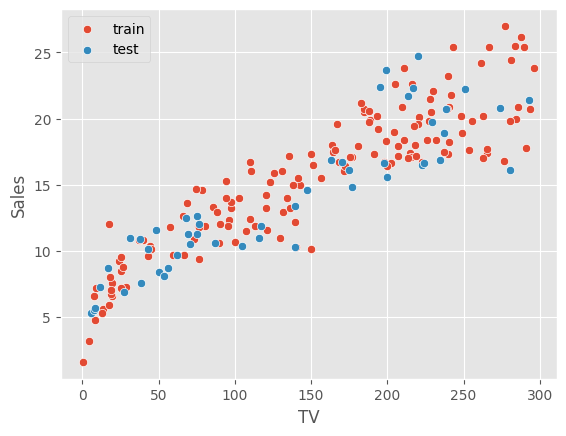

In [62]:
# ------------------------------------------
# 훈련세트, 테스트세트 분할 확인
# ------------------------------------------
sns.scatterplot(x=X_train["TV"], y=y_train, label="train")
sns.scatterplot(x=X_test["TV"], y=y_test, label="test")
plt.legend()

## 모델 생성 및 훈련
* 선형회귀 모델
    * 모듈 : `linear_model`
    * 클래스 : `LinearRegression`

In [63]:
# ------------------------------------------
# LinearRegression 클래스 import
# ------------------------------------------
from sklearn.linear_model import LinearRegression

# ------------------------------------------
# 모델객체 생성하기
# ------------------------------------------
model = LinearRegression()

# ------------------------------------------
# 훈련데이터로 모델 훈련하기
# ------------------------------------------
model.fit(X_train, y_train)

LinearRegression()

## 테스트세트로 평가
* **R2** 
    * 모델의 전반적인 성능(설명력)을 나타냄
        * 설명력 - 독립변수가 종속변수의 변동을 얼마나 잘 설명할 수 있는가
        * R2가 0.8이라면 모델이 80%를 설명할 수 있다. 20%는 모델에 포함되지 않은 요소들의 영향일 수 있다.
    * 0~1 사이로 정규화되어 있어 직관적으로 해석할 수 있음
    * 다른 모델 및 데이터셋과 비교하기 용이함      
* MSE
    * 오차를 제곱하기 때문에 해석하기 어려울 수 있음
    * 큰 오차 강조 : 큰 오차가 발생할 경우 MSE가 크게 증가. 큰 오차를 줄이는 데 집중할 수 있다.
    * 이상치에 민감하다.
* MAE
    * 원본 데이터와 같은 단위를 사용하여 해석이 용이하다.
* **RMSE**
    * MSE의 단점을 어느정도 보완하면서도 큰 오차에 대한 민감성을 유지
    * MSE의 제곱근. 원본 데이터와 같은 단위를 가져 직관적으로 이해하기 쉬움
    * 오차를 제곱하므로 이상치에 민감
    * MAE와의 차이가 클수록 오차에 대한 이상치가 존재함을 의미
    * MAE와 비슷하다면 이상치가 거의 없거나 오차가 고르개 분포함을 의미
* 평가와 관련된 함수들은 `metrics` 모듈에 포함되어 있음



In [64]:
# ------------------------------------------
# 평가 방법 선택 : MSE, MAE, RMSE, R2
# ------------------------------------------
from sklearn.metrics import r2_score, root_mean_squared_error, mean_absolute_error, mean_squared_error

# ------------------------------------------
# 테스트 데이터의 예측값
#   pred
# ------------------------------------------
pred = model.predict(X_test)

# ------------------------------------------
# 모델 평가 
#   - 예측값과 실제값의 차이(Loss/Error) 이용
# ------------------------------------------
mse = mean_squared_error(y_test, pred)
rmse = root_mean_squared_error(y_test, pred)
mae = mean_absolute_error(y_test, pred)
r2 = r2_score(y_test, pred)

print(f'R2  : {r2:.2f}')
print(f'RMSE: {rmse:.2f}')
print(f'MAE : {mae:.2f}')
print(f'MSE : {mse:.2f}')

R2  : 0.80
RMSE: 2.35
MAE : 1.87
MSE : 5.51


In [65]:
# ------------------------------------------
# 실제값과 모델의 예측값 비교
# ------------------------------------------
df_pred = pd.DataFrame({
    "X_test": X_test["TV"],
    "y_test": y_test,
    "pred": pred
})

df_pred["error"] = df_pred["y_test"] - df_pred["pred"]

df_pred.head()

df_pred.sort_values(by="error", ascending=False)

,X_test,y_test,pred,error
55,198.9,23.7,18.115235,5.584765
128,220.3,24.7,19.300506,5.399494
15,195.4,22.4,17.921382,4.478618
69,216.8,22.3,19.106654,3.193346
84,213.5,21.7,18.923878,2.776122
66,31.5,11.0,8.843529,2.156471
135,48.3,11.6,9.774023,1.825977
148,38.0,10.9,9.203542,1.696458
16,67.8,12.5,10.854060,1.645940
115,75.1,12.6,11.258382,1.341618


In [66]:
# ------------------------------------------
# 회귀모델의 평가점수 수동 계산
# ------------------------------------------
mae = abs(df_pred['error']).mean()
mse = np.square(df_pred['error']).mean()
rmse = np.sqrt(mse)

rss = np.square(df_pred['y_test'] - df_pred['pred']).sum()
tss = np.square(df_pred['y_test'] - df_pred['y_test'].mean()).sum()
r2 = 1 - (rss/tss)

print(f'r2:{r2:.2f}')
print(f'rmse:{rmse:.2f}')
print(f'mae:{mae:.2f}')
print(f'mse:{mse:.2f}')

r2:0.80
rmse:2.35
mae:1.87
mse:5.51


## 모델의 학습 결과

In [ ]:
w = model.coef_
b = model.intercept_

print(f"회귀계수: {w}")
print(f"절편: {b}")
print(f"회귀식: {w[0]} * TV + {b}")

회귀계수: [0.05538653]
절편: 7.098853680118275
회귀식: 0.05538653085519158 * TV + 7.098853680118275


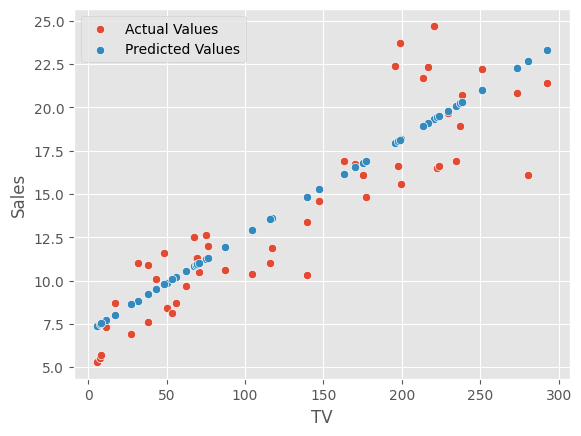

In [68]:
# ------------------------------------------
# 테스트데이터 실제값과 예측값 확인
# ------------------------------------------
sns.scatterplot(x=X_test["TV"], y=y_test, label="Actual Values")
sns.scatterplot(x=X_test["TV"], y=pred, label="Predicted Values")
plt.legend()

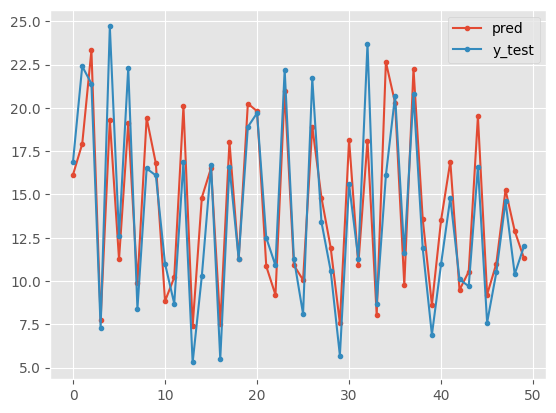

In [69]:
# ------------------------------------------
# 테스트데이터 실제값과 예측값 확인
# ------------------------------------------
plt.plot(pred, marker='.', label='pred')
plt.plot(np.array(y_test), marker='.', label='y_test')
plt.legend()

## 새로운 값 예측하기

In [73]:
# ----------------------------------
# TV 광고비 입력받기
# ----------------------------------
tv = 100

# ----------------------------------
# 예측 함수 사용
# ----------------------------------
print(model.predict([[tv]]))

# ----------------------------------
# 모델이 학습한 공식에 대입
# ----------------------------------
print(w[0] * tv + b)

[12.63750677]
12.637506765637433


/Users/j1star/Desktop/MS AI Projects/microsoft-ai-school/.venv/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
